In [1]:
import torch
import numpy as np
from ANN_model import Tainan_features12_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 32
RANDOM_STATE = 42

X = np.load('Grouped_by_city/tainan_features12_train.npy')
y = np.load('Grouped_by_city/tainan_target_train.npy')
X = np.delete(X, np.argmax(y, axis=0), axis=0)
y = np.delete(y, np.argmax(y, axis=0), axis=0)

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Total num of data: 477


In [3]:
model = Tainan_features12_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=500, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.001)

[Epoch 1/500] train_loss: 0.090251, test_loss: 0.011461 | train_mape: 67.5465, test_mape: 22.4916
[Epoch 2/500] train_loss: 0.014088, test_loss: 0.008964 | train_mape: 26.3802, test_mape: 23.7554
[Epoch 3/500] train_loss: 0.008922, test_loss: 0.008662 | train_mape: 20.7626, test_mape: 24.4184
[Epoch 4/500] train_loss: 0.007797, test_loss: 0.006653 | train_mape: 19.4574, test_mape: 20.1428
[Epoch 5/500] train_loss: 0.006428, test_loss: 0.004612 | train_mape: 17.7824, test_mape: 16.3264
[Epoch 6/500] train_loss: 0.005334, test_loss: 0.005164 | train_mape: 16.3241, test_mape: 17.3491
[Epoch 7/500] train_loss: 0.005486, test_loss: 0.005332 | train_mape: 16.7571, test_mape: 17.7977
[Epoch 8/500] train_loss: 0.005095, test_loss: 0.005060 | train_mape: 16.1251, test_mape: 17.2446
[Epoch 9/500] train_loss: 0.005292, test_loss: 0.004755 | train_mape: 16.6023, test_mape: 16.1779
[Epoch 10/500] train_loss: 0.004836, test_loss: 0.004010 | train_mape: 15.9527, test_mape: 14.3972
[Epoch 11/500] trai

In [4]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/tainan_features12_model1.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

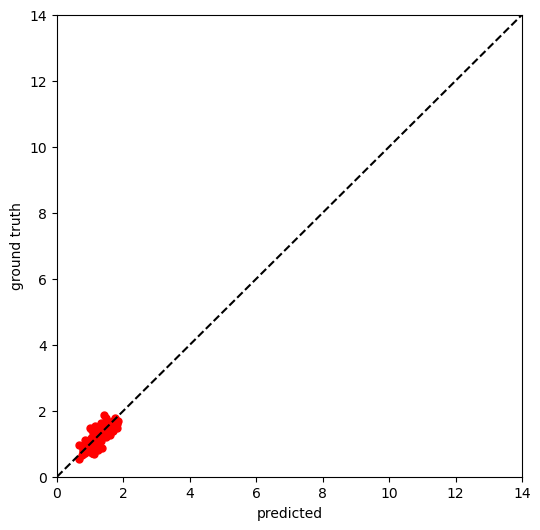

In [5]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

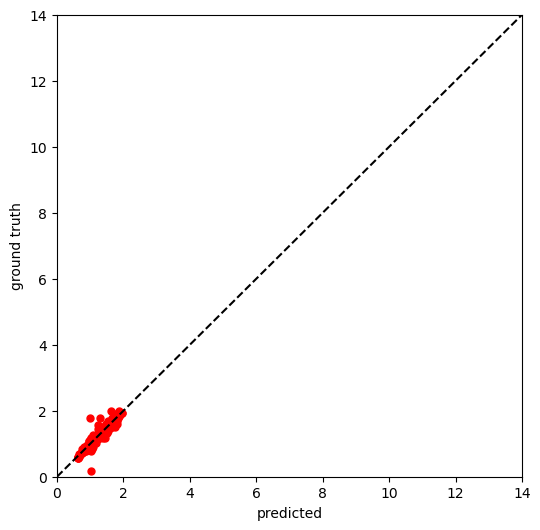

In [6]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)